# Some definitions from IAU
From the IAU [Circular 179](https://aa.usno.navy.mil/publications/docs/Circular_179.pdf)


# Reference Systems and Reference Frames
>The terminology that has become standard over the past decade or so distinguishes between a
reference system and a reference frame. A reference system is the complete specification of how a
celestial coordinate system is to be formed. Both the origin and the orientation of the fundamental
planes (or axes) are defined. A reference system also incorporates a specification of the fundamental
models needed to construct the system; that is, the basis for the algorithms used to transform
between observable quantities and reference data in the system. A reference frame, on the other
hand, consists of a set of identifiable fiducial points on the sky along with their coordinates, which
serves as the practical realization of a reference system.

## Barycentric (Solar System)
### ICRS: International Celestial Reference System

>The ICRS is a coordinate system with its origin at the solar system barycenter and axis directions that are fixed with respect to distant objects in the universe; it is to be used to express the positions and motions of stars, planets, and other celestial objects

> The idealized barycentric coordinate system to which celestial positions are referred. It is kinematically non-rotating
with respect to the ensemble of distant extragalactic objects. It has no intrinsic orientation but was aligned close to the mean equator and dynamical equinox of J2000.0
for continuity with previous fundamental reference systems. Its orientation is independent of epoch, ecliptic or equator and is realized by a list of adopted coordinates of
extragalactic sources

### ICRF: International Celestial Reference Frame
> A set of extragalactic objects
whose adopted positions and uncertainties realize the ICRS axes and give the uncertainties of the axes. It is also the name of the radio catalogue whose 212 defining sources
are currently the most accurate realization of the ICRS. Note that the orientation of the
ICRF catalogue was carried over from earlier IERS radio catalogs and was within the
errors of the standard stellar and dynamic frames at the time of adoption. Successive
revisions of the ICRF are intended to minimize rotation from its original orientation.
Other realizations of the ICRS have specific names (e.g. Hipparcos Celestial Reference
Frame).

## Geocentric (Earth's Center)

### GCRS: Geocentric Celestial Reference System
A non rotating frame.
>GCRS is distinct form ICRS mainly in that it is relative to the Earth’s center-of-mass rather than the solar system Barycenter. That means this frame includes the effects of aberration (unlike ICRS).

>The GCRS is the
system appropriate for describing the rotation of the Earth, the orbits of Earth satellites, and geodetic quantities such as instrument locations and baselines. The analysis
of precise observations inevitably involves quantities expressed in both systems and the
transformations between them.

>A system of geocentric spacetime coordinates within the framework of General Relativity with metric tensor specified
by the IAU 2000 Resolution B1.3. The GCRS is defined such that the transformation
between BCRS and GCRS spatial coordinates contains no rotation component, so that
GCRS is kinematically non-rotating with respect to BCRS. The equations of motion
of, for example, an Earth satellite with respect to the GCRS will contain relativistic
Coriolis forces that come mainly from geodesic precession. The spatial orientation of
the GCRS is derived from that of the BCRS, that is, unless otherwise stated, by the
orientation of the ICRS

### ITRS: International Terrestrial Reference System
>The ITRS is realized for practical purposes by
the adopted coordinates and velocities3 of a large group of observing stations. These coordinates are
expressed as geocentric rectangular 3-vectors and thus are not dependent on a reference ellipsoid.
The list of stations and their coordinates is referred to as the International Terrestrial Reference
Frame (ITRF).

### WGS 84: The World Geodetic System 1986 - GPS coordinates
>Is the basis for coordinates obtained from GPS, uses an Earth ellipsoid with aE = 6378137 m and f = 1/298.257223563.
...
 It is important to
know, however, that the ITRS/ITRF is consistent with WGS 84 to within a few centimeters; thus
for all astronomical purposes the GPS-obtained coordinates of instruments can be used with the
algorithms presented here [at the circular 179]

Geodetic makes reference to the coordinates over the surface of a ellipsoid. Their angles are not equivalent to angles in spherical coordinates from a geocentric system. [Geodetic Coordinate System](https://www-lite.larc.nasa.gov/level1doc/geodetic_coords.html)
![The Geometry of Geodetic Coordinates](https://www-lite.larc.nasa.gov/level1doc/lite_geometry_xy.gif)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
from astropy import time

First, we define an "coordinates" object in the **International Terrestrial Reference System** (**ITRS**). These objects can be created from the cartesian coordinates (x,y,z). By default is defined at observation time (obstime=J2000.000)

This object is very close to Earth's Surface.

[ITRS reference at Astropy Documentation](http://docs.astropy.org/en/stable/api/astropy.coordinates.ITRS.html)

In [2]:
itrs = coord.ITRS(x=6900*u.km, y=0*u.km, z=-210*u.km)
print(itrs)

<ITRS Coordinate (obstime=J2000.000): (x, y, z) in km
    (6900., 0., -210.)>


Then, we can do the transformation to the barycenter system as:

In [3]:
icrs = itrs.transform_to(coord.ICRS)
print(icrs)

<ICRS Coordinate: (ra, dec, distance) in (deg, deg, km)
    (101.76557966, 23.0113199, 1.46882546e+08)>


Note the distance, is almost an astronomic unit from the Solar System Barycenter.

## The Eart Rotating System to Non Rotating System

[coord.EarthLocation](https://docs.astropy.org/en/stable/api/astropy.coordinates.EarthLocation.html) objects internally store information in geocentric coordinates. 
>Initialization is first attempted assuming geocentric (x, y, z) coordinates are given; if that fails, another attempt is made assuming geodetic coordinates (longitude, latitude, height above a reference ellipsoid). 

Astropy has the methods to do transformation from Earth Location (useful to deal with ground stations) to the Non-Rotating System (Useful for Satellite orbits)

We take Bogotá's coordinates: 

>Lat = 4.609 N <p>
>Long = -74.081 W <p>
>Height over sea level: 2600m


With this information we can create a EarthLocation object:

In [4]:
bogota = coord.EarthLocation(4.6097102, -74.081749, height=2600.)
print(bogota)

(1749778.0509086507, 141082.26654147235, -6113947.630573062) m


This is its representation in cartesian coordinates in the geocentric system. Unless geological time scales, this location is fixed, does not need to specify observation time.

In [5]:
bogota.geodetic

GeodeticLocation(lon=<Longitude 4.6097102 deg>, lat=<Latitude -74.081749 deg>, height=<Quantity 2600. m>)

In [6]:
bogota.to_geocentric()

(<Quantity 1749778.05090865 m>,
 <Quantity 141082.26654147 m>,
 <Quantity -6113947.63057306 m>)

In [7]:
bogota.itrs

<ITRS Coordinate (obstime=J2000.000): (x, y, z) in m
    (1749778.05090865, 141082.26654147, -6113947.63057306)>

Now lets include the time. Having two different times to make comparisson.

In [8]:
t0 = time.Time.now
t0

<bound method Time.now of <class 'astropy.time.core.Time'>>

In [9]:
date1 = "2019-06-26 23:32:33.656972"
t1 = time.Time(date1)
t1

<Time object: scale='utc' format='iso' value=2019-06-26 23:32:33.657>

In [10]:
print(t0(), t1)

2019-07-03 23:29:09.492784 2019-06-26 23:32:33.657


As we expected, the location of Bogotá has not changed in the last days, neither in the last twenty years, according to the International Terrestrial Reference System.

In [11]:
print(bogota.get_itrs(), "\n")
print(bogota.get_itrs(obstime=t1), "\n")
print(bogota.get_itrs(obstime=t0()), "\n")

<ITRS Coordinate (obstime=J2000.000): (x, y, z) in m
    (1749778.05090865, 141082.26654147, -6113947.63057306)> 

<ITRS Coordinate (obstime=2019-06-26 23:32:33.657): (x, y, z) in m
    (1749778.05090865, 141082.26654147, -6113947.63057306)> 

<ITRS Coordinate (obstime=2019-07-03 23:29:09.601288): (x, y, z) in m
    (1749778.05090865, 141082.26654147, -6113947.63057306)> 



# From ITRS to GCRS

Now lets evaluate the position of Bogotá, respect to the Geocentric Celestial Reference System.

The coord.EartLocation object has two interesting methods: get_grs() and get_gcrs_posvel(). They have an observation time argument.

### get_gcrs()
>GCRS position with velocity at obstime as a GCRS coordinate.
>
>Parameters:	
>obstime : Time. The obstime to calculate the GCRS position/velocity at.
>
>Returns:	
>
>gcrs : GCRS instance[(ra, dec, distance) in (deg, deg, m)]. 
>
>With velocity included.
>[(pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)]

### get_gcrs_posvel()
>Calculate the GCRS position and velocity of this object at the requested
>
>Parameters:	
>obstime : Time.
>The obstime to calculate the GCRS position/velocity at.
>
>Returns:	
>
>obsgeoloc : CartesianRepresentation. The GCRS position of the object. (x,y,z) in meters
>
>obsgeovel : CartesianRepresentation. The GCRS velocity of the object. (vx,vy,vz) in meters per second




In [12]:
bogota.get_gcrs(obstime=t1)

<GCRS Coordinate (obstime=2019-06-26 23:32:33.657, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, m)
    (271.92939511, -73.9850439, 6360973.43674094)
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    (1.30990723e+11, -8.82716193e+08, -1.70964767e-08)>

In [13]:
bogota.get_gcrs_posvel(obstime=t1)

(<CartesianRepresentation (x, y, z) in m
     (59084.46033492, -1753923.03407527, -6114102.23009159)>,
 <CartesianRepresentation (x, y, z) in m / s
     (127.90689783, 5.13841266, -0.23796814)>)

In [14]:
bogota.get_gcrs_posvel(obstime=t0())

(<CartesianRepresentation (x, y, z) in m
     (243533.19803819, -1736727.08897156, -6114446.30874301)>,
 <CartesianRepresentation (x, y, z) in m / s
     (126.65294572, 18.58990834, -0.23574318)>)

We can see how Bogotá's position has changed. Even few seconds later (calling t0() again)

In [15]:
bogota.get_gcrs_posvel(obstime=t0())

(<CartesianRepresentation (x, y, z) in m
     (243572.05215192, -1736721.38559645, -6114446.3810673)>,
 <CartesianRepresentation (x, y, z) in m / s
     (126.6523848, 18.59271596, -0.2357203)>)

## A small experiment

The Eart's rotation axis orientation changes in time (nutation and precesion) respect to J2000.00. We can see how z and vz change according to the epoch.

In [16]:
V = bogota.get_gcrs_posvel(obstime=t1 + 10 * 3600 * u.s )[1]

In [17]:
V.z.value

0.2129352381452918

In [18]:
v = []
t = []
for i in range(24):
    V = bogota.get_gcrs_posvel(obstime=t1 + i * 3600 * u.s )[1]
    
    v.append( V.z.value )
    t.append(i)

Text(0,0.5,'V_z (m/s)')

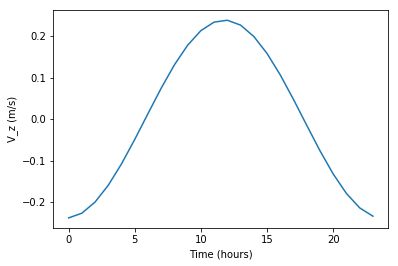

In [19]:
plt.plot(t,v)
plt.xlabel("Time (hours)")
plt.ylabel("V_z (m/s)")

In [20]:
min(v)

-0.23796814121305943

In [21]:
max(v)

0.23786986246705055

We can comparate Vz at epoch = now vs epoch = J2000.0, when Earth's rotation axis was pretty close to GCRS Z axis.

In [22]:
J2000 = "2000-01-01 12:00:00.0"
t3 = time.Time(J2000)

In [23]:
w = []
t = []
for i in range(24):
    W = bogota.get_gcrs_posvel(obstime=t3 + i * 3600 * u.s )[1]
    
    w.append( W.z.value )
    t.append(i)


Text(0,0.5,'V_z (m/s)')

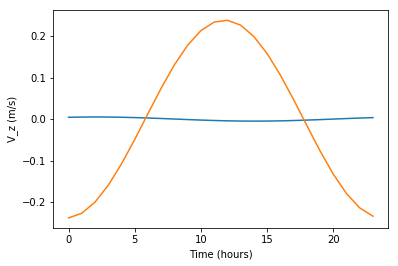

In [24]:
plt.plot(t,w, label="Epoch=J2000")
plt.plot(t,v, label="Epoch=Now")
plt.xlabel("Time (hours)")
plt.ylabel("V_z (m/s)")

# Poliastro Reference System

According to Poliastro V0.9.1 documentation:

>class poliastro.twobody.orbit.Orbit(state, epoch)
>
>Position and velocity of a body with respect to an attractor at a given time (epoch).
>
>Regardless of how the Orbit is created, the implicit reference system is an inertial one. For the specific case of the Solar System, this can be assumed to be the International Celestial Reference System or ICRS.

So, we can infer that the implicit frame of reference for satellites is the GCRS

In [25]:
from poliastro.examples import iss

In [58]:
from poliastro.bodies import Earth
import poliastro

In [26]:
iss

6772 x 6790 km x 51.6 deg orbit around Earth (♁)

In [35]:
iss.state

In [36]:
iss.state.period

<Quantity 5556.96970116 s>

In [37]:
iss.state.v

<Quantity [7.37289205, 2.08223573, 0.43999979] km / s>

In [38]:
iss.state.r

<Quantity [  859.07256, -4137.20368,  5295.56871] km>

In [42]:
iss.a

<Quantity 6780.85876692 km>

In [44]:
iss.sample(10)


(<Time object: scale='utc' format='iso' value=['2013-03-18 11:48:02.422' '2013-03-18 11:58:19.121'
  '2013-03-18 12:08:36.168' '2013-03-18 12:18:53.746'
  '2013-03-18 12:29:11.792' '2013-03-18 11:06:53.053'
  '2013-03-18 11:17:11.099' '2013-03-18 11:27:28.677'
  '2013-03-18 11:37:45.724' '2013-03-18 11:48:02.422']>,
 <CartesianRepresentation (x, y, z) in km
     [(-4136.38403782, -4179.52820669,  3358.86048469),
      (  111.32368864, -4319.84135552,  5216.7714807 ),
      ( 4309.47181487, -2436.29634467,  4631.64269897),
      ( 6493.70017538,   589.77518201,  1877.26239945),
      ( 5641.98404531,  3342.44072615, -1757.56426418),
      ( 2152.85086767,  4533.69748717, -4572.06149941),
      (-2341.09516632,  3606.14318726, -5249.29477023),
      (-5737.0867627 ,   993.79079195, -3472.3791026 ),
      (-6446.10171129, -2081.01097993,   -72.75308564),
      (-4136.38403782, -4179.52820669,  3358.86048469)]>)

In [47]:
iss.epoch

<Time object: scale='utc' format='iso' value=2013-03-18 12:00:00.000>

In [56]:
iss.propagate(6.29 * u.year).sample(10)

(<Time object: scale='utc' format='iso' value=['2019-07-02 22:49:55.118' '2019-07-02 23:00:11.817'
  '2019-07-02 23:10:28.863' '2019-07-02 23:20:46.441'
  '2019-07-02 23:31:04.487' '2019-07-02 22:08:45.748'
  '2019-07-02 22:19:03.794' '2019-07-02 22:29:21.373'
  '2019-07-02 22:39:38.419' '2019-07-02 22:49:55.118']>,
 <CartesianRepresentation (x, y, z) in km
     [(-4136.38403782, -4179.52820669,  3358.86048469),
      (  111.32368864, -4319.84135552,  5216.7714807 ),
      ( 4309.47181487, -2436.29634467,  4631.64269897),
      ( 6493.70017538,   589.77518201,  1877.26239945),
      ( 5641.98404531,  3342.44072615, -1757.56426418),
      ( 2152.85086767,  4533.69748717, -4572.06149941),
      (-2341.09516632,  3606.14318726, -5249.29477023),
      (-5737.0867627 ,   993.79079195, -3472.37910261),
      (-6446.10171129, -2081.01097993,   -72.75308564),
      (-4136.38403782, -4179.52820669,  3358.86048469)]>)

ISS data https://spaceflight.nasa.gov/realdata/sightings/SSapplications/Post/JavaSSOP/orbit/ISS/SVPOST.html

In [71]:
VECTORTIME = "2019/187/09:50:00.000"

X = -3210187.08 * u.m
Y =  4054699.69 * u.m
Z = -4413214.06 * u.m

Xdot = -3135.666924 * u.m / u.s
Ydot = -6121.893548 * u.m / u.s
Zdot = -3353.651106 * u.m / u.s


# References

### USNO 

USNO Circular 179 https://aa.usno.navy.mil/publications/docs/Circular_179.pdf The IAU Resolutions
on Astronomical Reference Systems,
Time Scales, and Earth Rotation Models
Explanation and Implementation. George H. Kaplan. (2005)

### Astropy Documentation

ITRS http://docs.astropy.org/en/stable/api/astropy.coordinates.ITRS.html

EarthLocation Objects https://docs.astropy.org/en/stable/api/astropy.coordinates.EarthLocation.html


### Poliastro

Reference Frames: https://github.com/poliastro/poliastro/wiki/Reference-frames

Orbits and Reference Frames (v0.11) https://github.com/poliastro/poliastro/wiki/Orbits-and-reference-frames

General documentation (v0.9.1) https://docs.poliastro.space/en/v0.9.1/

https://docs.poliastro.space/en/v0.9.1/references.html

http://web.archive.org/web/20170920023932/http://aa.usno.navy.mil:80/faq/docs/ICRS_doc.php

https://en.wikipedia.org/wiki/Earth-centered_inertial